<a href="https://colab.research.google.com/github/manu-choraria/Regression-Models-Comparison/blob/main/regression_models_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

**Importing dataset**

In [ ]:
file= pd.read_csv('/content/housing_price_prediction.csv')
print(file)

                 id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7.129301e+09         3       1.00       1180.0    5650.0     1.0   
1      6.414100e+09         3       2.25       2570.0    7242.0     2.0   
2      5.631500e+09         2       1.00        770.0   10000.0     1.0   
3      2.487201e+09         4       3.00       1960.0    5000.0     1.0   
4      1.954401e+09         3       2.00       1680.0    8080.0     1.0   
...             ...       ...        ...          ...       ...     ...   
31973  2.630000e+08         3       2.50       1530.0    1131.0     3.0   
31974  6.600060e+09         4       2.50       2310.0    5813.0     2.0   
31975  1.523300e+09         2       0.75       1020.0    1350.0     2.0   
31976  2.913101e+08         3       2.50       1600.0    2388.0     2.0   
31977  1.523300e+09         2       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0    

**First five data**

In [ ]:
file.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


**Last five data**

In [ ]:
file.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0
21612,1523300157,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000.0


**Information of dataset**

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

**Five point summary, Mean , Standard deviation of data**

In [ ]:
file.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.401822e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.673622e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


**Missing values and number of missing values**

In [ ]:
print(file.isnull())
print("Number of missing values per column:")
file.isnull().sum()

          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
...      ...       ...        ...          ...       ...     ...         ...   
21608  False     False      False        False     False   False       False   
21609  False     False      False        False     False   False       False   
21610  False     False      False        False     False   False       False   
21611  False     False      False        False     False   False       False   
21612  False     False      False        False     False   False       False   

        view  condition  grade  sqft_ab

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

**Visualization of dependency of price on area size**





**Histogram for various features**

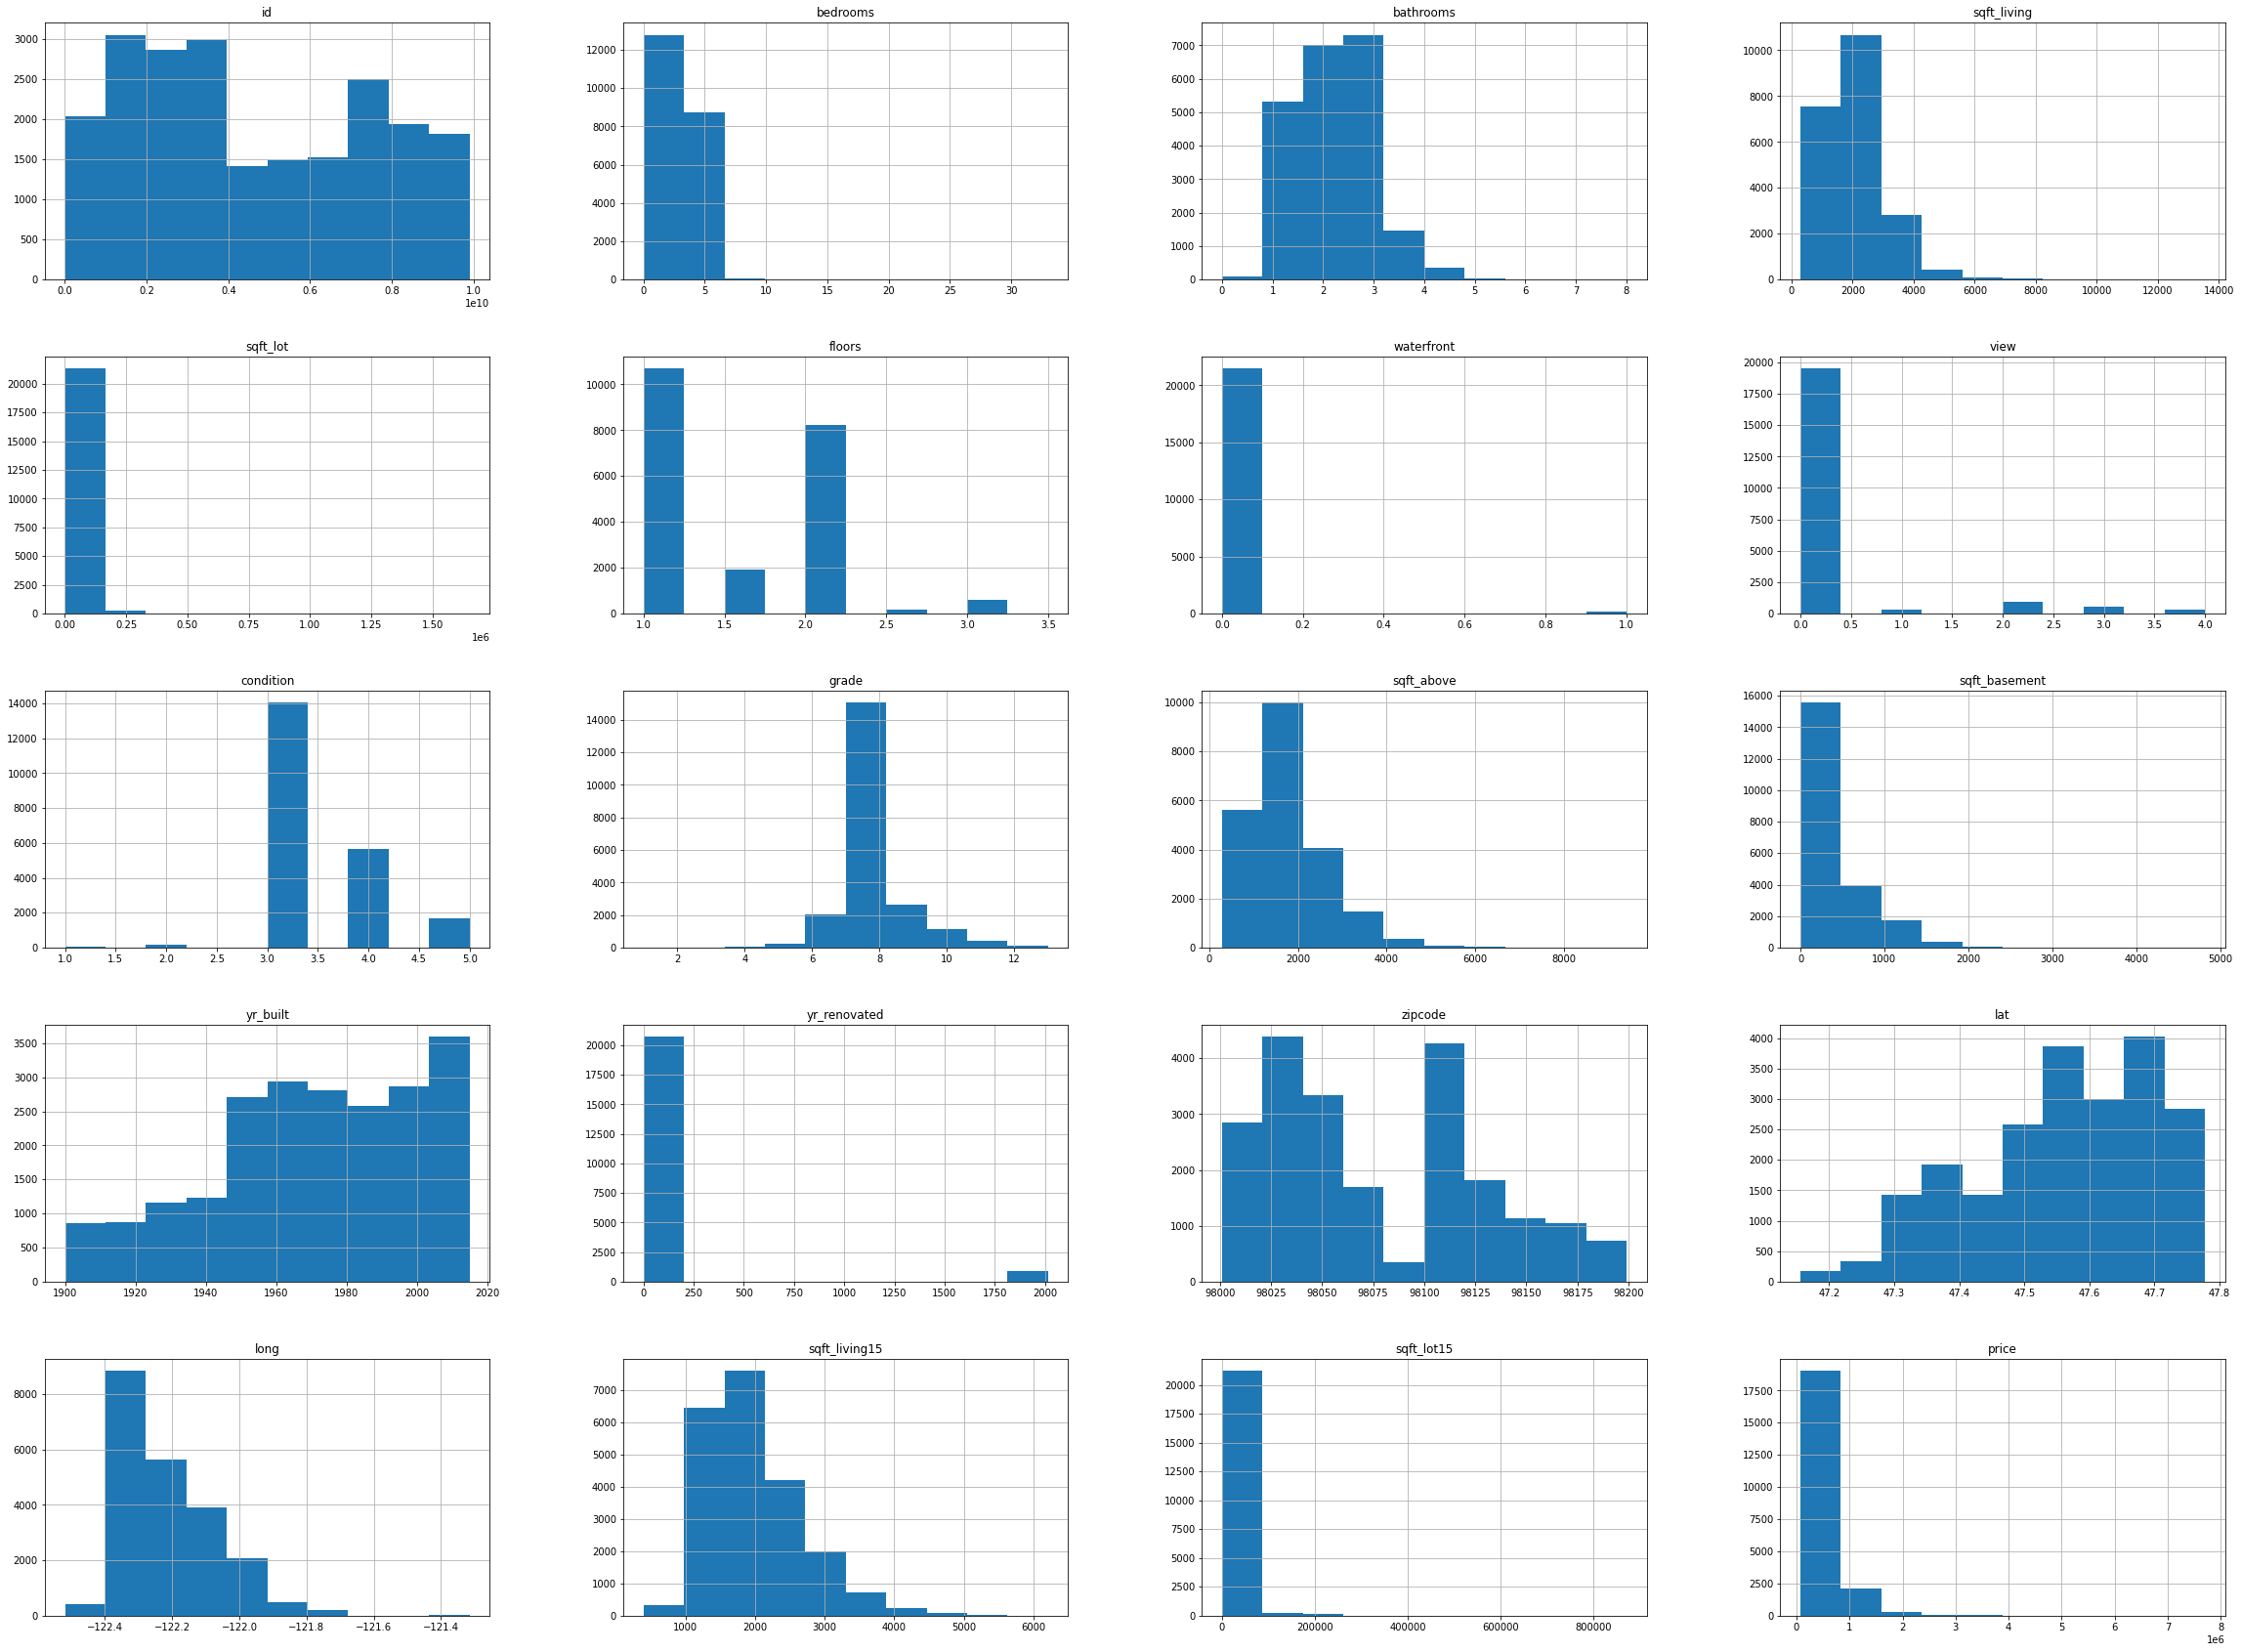

In [ ]:
%matplotlib inline
file.hist(figsize=(40,30))
plt.savefig("histogram.png")
plt.show()

**Splitting the data, Training the model and Testing the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
x=file[{'bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living','price'}]
y=file['price']
X_train, x_test, Y_train, y_test=train_test_split(x,y,test_size=0.2)
LinReg=LinearRegression()
LinReg.fit(X_train, Y_train)
y_predict=LinReg.predict(x_test)
mse=mean_squared_error(y_test,y_predict)
print('Mean Squared Error:',mse)
print('RMSE:',sqrt(mse))

Mean Squared Error: 1.0287100521624356e-20
RMSE: 1.0142534457237183e-10


[[ 3.00000e+00  1.00000e+00  1.18000e+03 ... -1.22257e+02  1.34000e+03
   5.65000e+03]
 [ 3.00000e+00  2.25000e+00  2.57000e+03 ... -1.22319e+02  1.69000e+03
   7.63900e+03]
 [ 2.00000e+00  1.00000e+00  7.70000e+02 ... -1.22233e+02  2.72000e+03
   8.06200e+03]
 ...
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   2.00700e+03]
 [ 3.00000e+00  2.50000e+00  1.60000e+03 ... -1.22069e+02  1.41000e+03
   1.28700e+03]
 [ 2.00000e+00  7.50000e-01  1.02000e+03 ... -1.22299e+02  1.02000e+03
   1.35700e+03]]


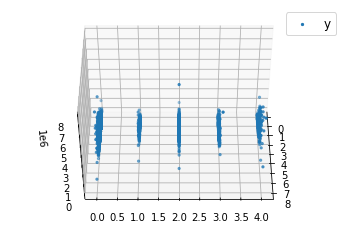

In [ ]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
x=np.array(file.drop(['price','id'], axis='columns'))
y=np.array(file['price'])
print(x)
mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure()
ax = fig.gca(projection ='3d')

ax.scatter(x[:, 1], x[:, 6], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)
plt.savefig("multiple linear regg with scatter plot.png")
plt.show()


**The Spearman rank coefficient**

In [ ]:
print("The Spearman rank coefficient of different pairwise columns is as follows:"+"\n"+('-'*245))
file.corr(method ='spearman')
for i 

The Spearman rank coefficient of different pairwise columns is as follows:
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.006250,0.015051,0.001656,-0.116792,0.018837,-0.003573,0.012552,-0.023969,0.019835,0.003523,0.001408,0.026537,-0.017473,-0.005359,-0.003732,0.007413,-0.000035,-0.114735,0.004176
bedrooms,0.006250,1.000000,0.521406,0.647366,0.216531,0.227541,-0.007598,0.081421,0.012660,0.380534,0.539704,0.230496,0.180022,0.016877,-0.167186,-0.021185,0.191389,0.443816,0.201577,0.344653
bathrooms,0.015051,0.521406,1.000000,0.745526,0.068805,0.546800,0.049522,0.155549,-0.162891,0.658194,0.691006,0.191848,0.566982,0.042688,-0.204783,0.008283,0.261539,0.570304,0.063111,0.497162
sqft_living,0.001656,0.647366,0.745526,1.000000,0.304159,0.401267,0.070326,0.232994,-0.062638,0.716400,0.843504,0.327878,0.352421,0.052679,-0.206848,0.030980,0.284584,0.746982,0.283864,0.644192
sqft_lot,-0.116792,0.216531,0.068805,0.304159,1.000000,-0.234433,0.085601,0.117033,0.114724,0.152049,0.272408,0.036624,-0.037569,0.008536,-0.319494,-0.122052,0.370551,0.359572,0.922316,0.074937
floors,0.018837,0.227541,0.546800,0.401267,-0.234433,1.000000,0.023879,0.019655,-0.287915,0.501684,0.599280,-0.272458,0.551663,0.012579,-0.061461,0.024564,0.148651,0.305434,-0.231386,0.322349
waterfront,-0.003573,-0.007598,0.049522,0.070326,0.085601,0.023879,1.000000,0.284924,0.016744,0.062189,0.054490,0.051969,-0.028605,0.091649,0.029591,-0.019044,-0.038139,0.074564,0.092271,0.115089
view,0.012552,0.081421,0.155549,0.232994,0.117033,0.019655,0.284924,1.000000,0.046000,0.217044,0.144394,0.236525,-0.066607,0.096539,0.078215,-0.000073,-0.102728,0.255793,0.116520,0.293928
condition,-0.023969,0.012660,-0.162891,-0.062638,0.114724,-0.287915,0.016744,0.046000,1.000000,-0.167374,-0.158126,0.161623,-0.393816,-0.066180,-0.022416,-0.022341,-0.085270,-0.086905,0.117719,0.018494
grade,0.019835,0.380534,0.658194,0.716400,0.152049,0.501684,0.062189,0.217044,-0.167374,1.000000,0.711815,0.092927,0.500633,0.016029,-0.181552,0.103921,0.222791,0.662635,0.156109,0.658217


**Correlation matrix for various features**

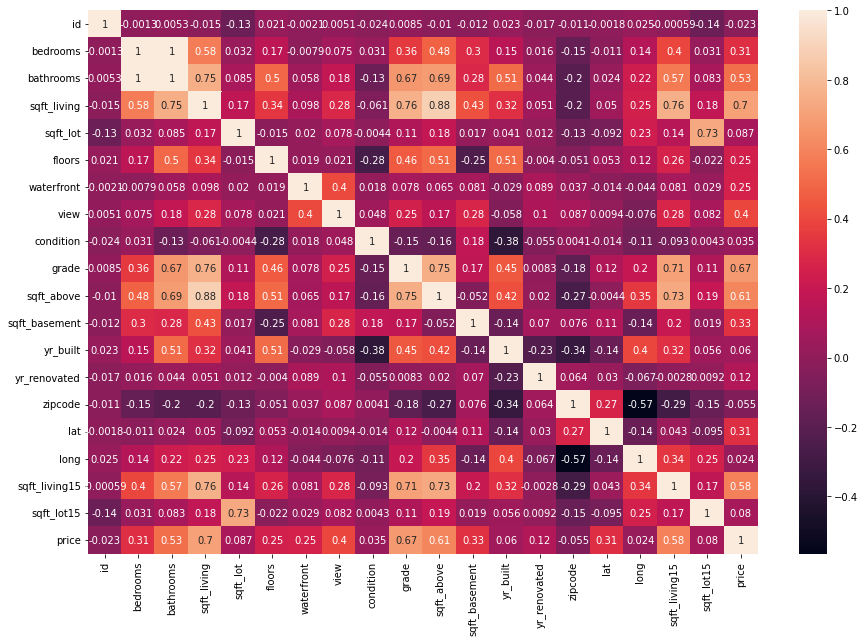

In [ ]:
corrfile=file.corr()
plt.subplots(figsize=(15,10))
sn.heatmap(corrfile,annot=True)
plt.savefig("corrmatrix.png")
plt.show()

****